In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing necessary librarires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# read the dataset
pd.set_option('display.max_columns',None)
df = pd.read_csv("C:/Users/User/Downloads/diabetes_prediction_dataset.csv")
df.sample(5)

gender   age  hypertension  heart_disease smoking_history    bmi  \
7678   Female  47.0             0              0          former  37.93   
12483    Male  11.0             0              0         No Info  26.74   
76745  Female  71.0             0              0           never  27.32   
66336    Male  46.0             1              0         No Info  27.32   
67608  Female  30.0             0              0           never  39.08   

       HbA1c_level  blood_glucose_level  diabetes  
7678           6.5                  160         0  
12483          6.1                  158         0  
76745          4.0                  155         0  
66336          5.7                  100         0  
67608          3.5                  159         0

# 1. Dive Into Data

In [4]:
# create a report 
from ydata_profiling import ProfileReport
report = ProfileReport(df, title="Profiling Report", explorative=True)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
# size of data
df.shape

(100000, 9)

In [6]:
# information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [7]:
# check missing values
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [8]:
# check duplicate values
df.duplicated().sum()

3854

In [9]:
# statistical summary of numeric columns
df.describe().T

count        mean        std    min     25%     50%  \
age                  100000.0   41.885856  22.516840   0.08   24.00   43.00   
hypertension         100000.0    0.074850   0.263150   0.00    0.00    0.00   
heart_disease        100000.0    0.039420   0.194593   0.00    0.00    0.00   
bmi                  100000.0   27.320767   6.636783  10.01   23.63   27.32   
HbA1c_level          100000.0    5.527507   1.070672   3.50    4.80    5.80   
blood_glucose_level  100000.0  138.058060  40.708136  80.00  100.00  140.00   
diabetes             100000.0    0.085000   0.278883   0.00    0.00    0.00   

                        75%     max  
age                   60.00   80.00  
hypertension           0.00    1.00  
heart_disease          0.00    1.00  
bmi                   29.58   95.69  
HbA1c_level            6.20    9.00  
blood_glucose_level  159.00  300.00  
diabetes               0.00    1.00

In [10]:
# summary of categorical column
df.describe(include='object')

gender smoking_history
count   100000          100000
unique       3               6
top     Female         No Info
freq     58552           35816

In [11]:
# correlation between target variable and features
df.corr(numeric_only=True)['diabetes']

age                    0.258008
hypertension           0.197823
heart_disease          0.171727
bmi                    0.214357
HbA1c_level            0.400660
blood_glucose_level    0.419558
diabetes               1.000000
Name: diabetes, dtype: float64

# 2. Data Cleaning

In [12]:
df['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [13]:
df['smoking_history'].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [14]:
# remove 'Other' from ['gender'] column
#df.drop(df[df['gender']=='Other'].index,inplace=True)
df = df[df['gender'] != 'Other']
df['gender'].value_counts()

gender
Female    58552
Male      41430
Name: count, dtype: int64

In [15]:
# remove duplicate records
df.drop_duplicates(inplace=True)
print(df.shape)

(96128, 9)


# 3. Feature  Construction

In [16]:
# creating 10 years age groups
#bins =[0,10,20,30,40,50,60,70,80]
#abels = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80']
#df['age_group'] = pd.cut(df['age'],bins=bins,labels=labels,right=True)

In [17]:
# construct a new feature 'age_stage' based on the age classification
def age_stage(age):
    if age<=1:                    # Infants(0-1)
        return 'Infant'         
    elif age<=12:                 # Children(2-12)
        return 'Child'
    elif age<=19:                 # Teenagers(13-19)
        return 'Teenager'
    elif age<=24:                 # Youths(20-24)
        return 'Youth'
    elif age<=64:                 # Adults(25-64)
        return 'Adult'
    else:                         # Seniors(65 years and over)
        return 'Senior'
df['age_stage'] = df['age'].apply(age_stage)
df.sample(5)

gender   age  hypertension  heart_disease smoking_history    bmi  \
3422   Female  33.0             0              0           never  39.50   
77237  Female  76.0             0              0          former  35.95   
42160  Female  73.0             0              0          former  21.54   
98030    Male  25.0             0              0         current  18.09   
45757  Female  80.0             0              0         No Info  16.01   

       HbA1c_level  blood_glucose_level  diabetes age_stage  
3422           3.5                  100         0     Adult  
77237          5.7                  126         0    Senior  
42160          6.5                  100         0    Senior  
98030          6.2                  155         0     Adult  
45757          3.5                  126         0    Senior

# 4. EDA

**UV analysis**

gender
Female    56161
Male      39967
Name: count, dtype: int64
None


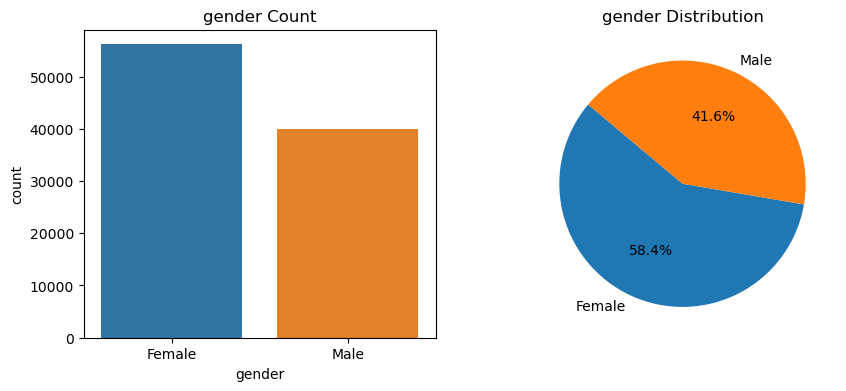

In [18]:
# create a funtion for categorical feature analysis
def univariate_analysis(column):
    counts = df[column].value_counts(normalize=True) * 100
    print(df[column].value_counts())
    plt.figure(figsize=(10,4))
    plt.subplot(121)
    sns.countplot(data=df,x=column)
    plt.title(column+' Count')

    plt.subplot(122)
    plt.pie(counts,labels=counts.index,autopct='%1.1f%%',startangle=140)
    plt.title(column+' Distribution')
# gender distribution   
print(univariate_analysis('gender'))

hypertension
0    88667
1     7461
Name: count, dtype: int64
None


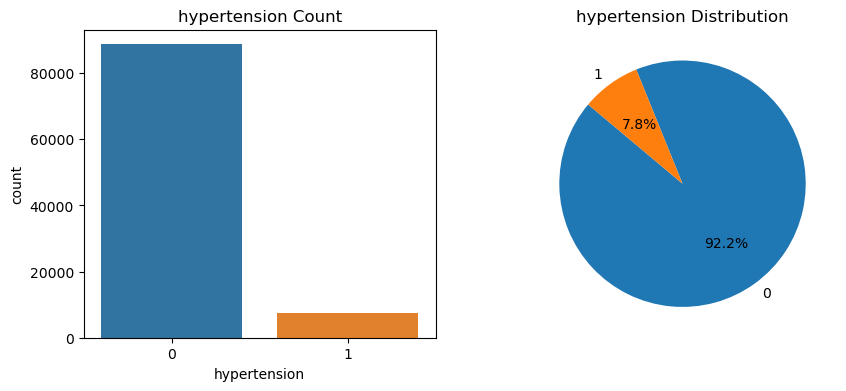

In [19]:
# hypertension distribution
print(univariate_analysis('hypertension'))

heart_disease
0    92205
1     3923
Name: count, dtype: int64
None


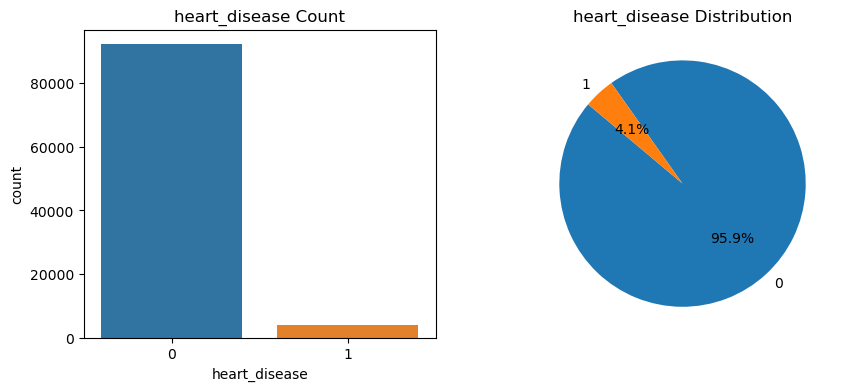

In [20]:
# heart_disease distribution
print(univariate_analysis('heart_disease'))

smoking_history
never          34395
No Info        32881
former          9299
current         9197
not current     6359
ever            3997
Name: count, dtype: int64
None


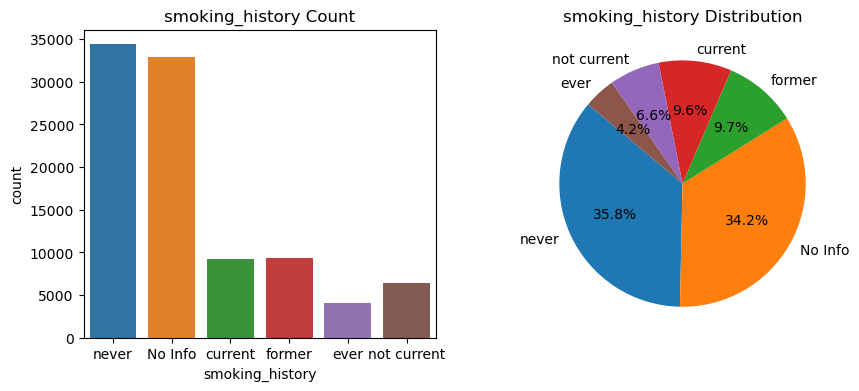

In [21]:
# smoking_history distibution
print(univariate_analysis('smoking_history'))

diabetes
0    87646
1     8482
Name: count, dtype: int64
None


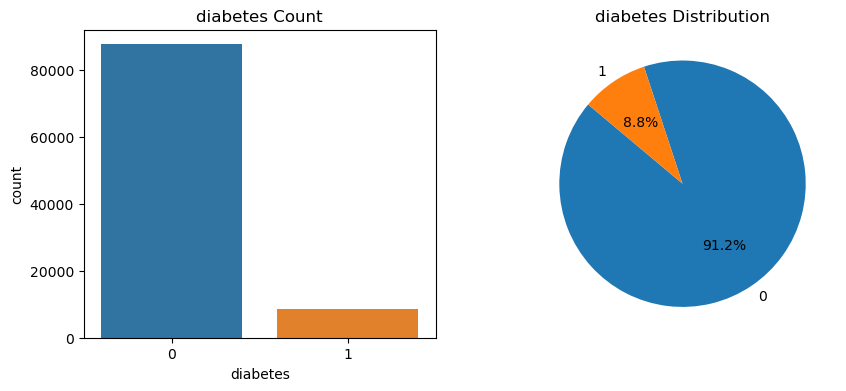

In [22]:
# diabetes distribution
print(univariate_analysis('diabetes'))

age_stage
Adult       53525
Senior      17656
Child       10992
Teenager     7040
Youth        5922
Infant        993
Name: count, dtype: int64
None


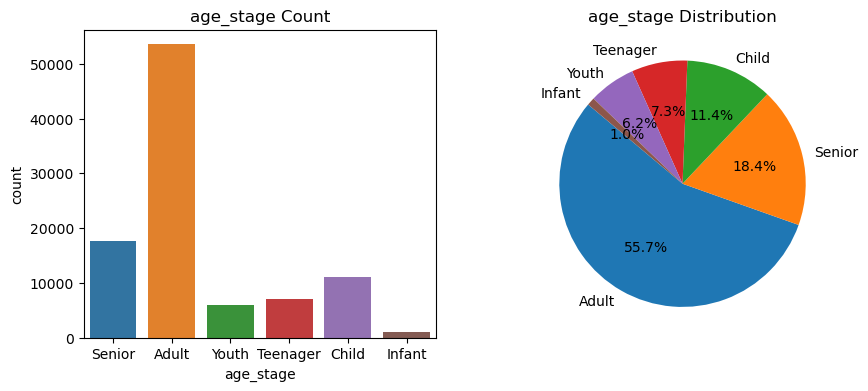

In [23]:
# age_stage distribution
print(univariate_analysis('age_stage'))

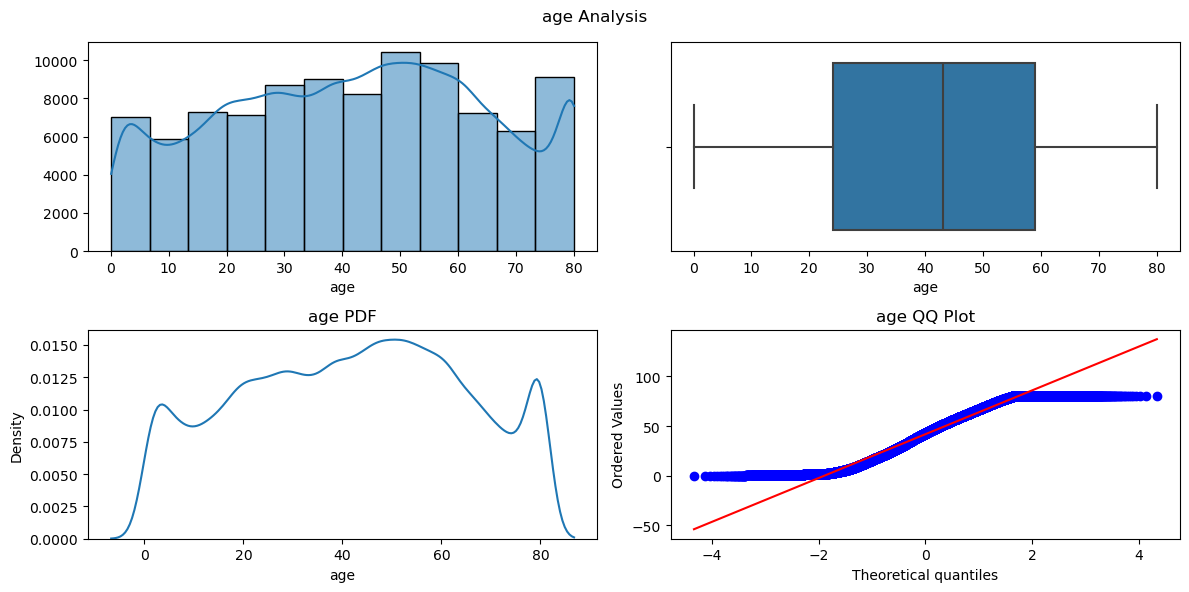

In [24]:
import scipy.stats as stats
# create a function for continuous feature analysis
def uv_analysis(col):
    plt.figure(figsize=(12,6))

    plt.suptitle(col+' Analysis')
    plt.subplot(221)
    sns.histplot(df[col],kde=True,bins=12)
    plt.ylabel('')

    plt.subplot(222)
    sns.boxplot(x=df[col])

    plt.subplot(223)
    plt.title(col+' PDF')
    sns.distplot(df[col],bins=12,hist=False)
    # QQ Plot
    plt.subplot(224)
    stats.probplot(df[col],dist='norm',plot=plt)
    plt.title(col+' QQ Plot')
    plt.tight_layout()
    return ''
# age distribution
print(uv_analysis('age'))

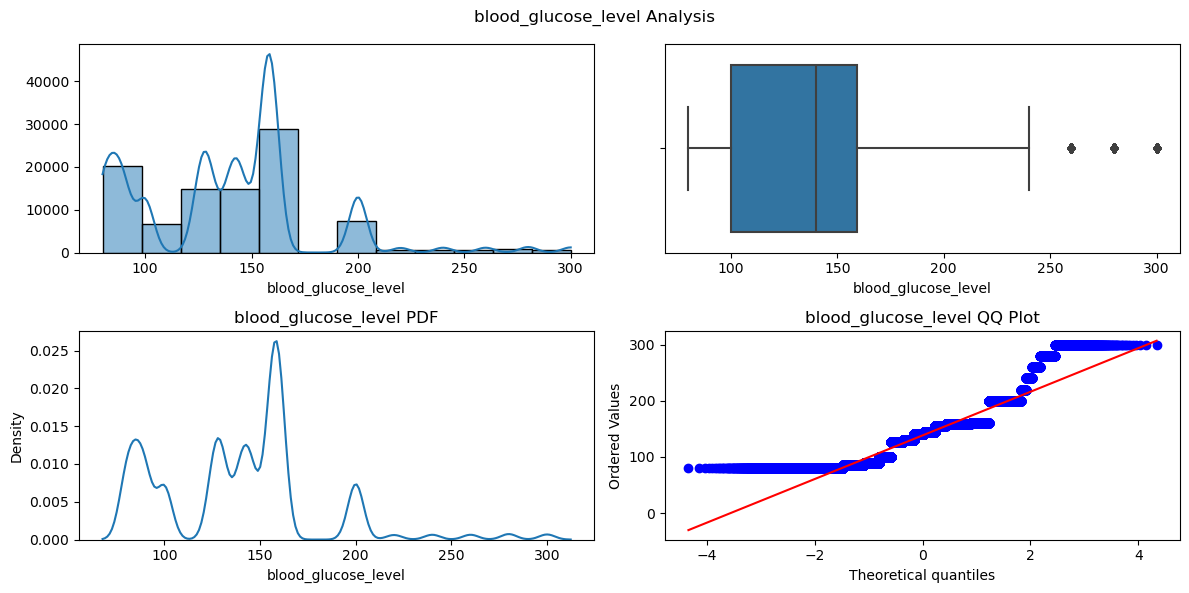

In [25]:
# blood_glucose_level distribution
print(uv_analysis('blood_glucose_level'))

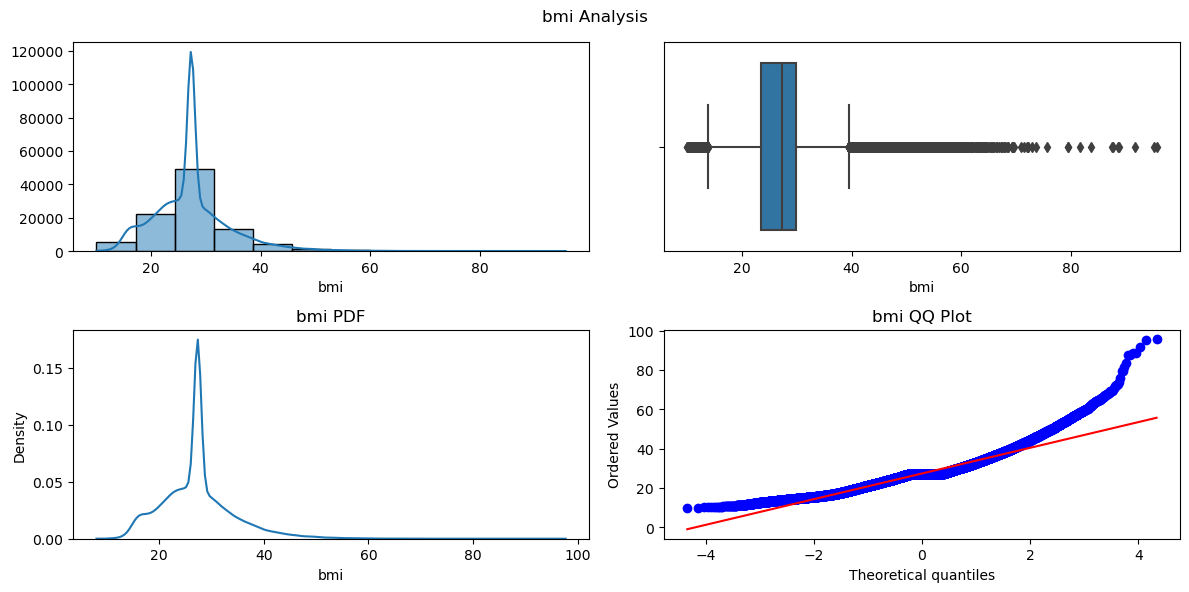

In [26]:
# bmi distribution
print(uv_analysis('bmi'))

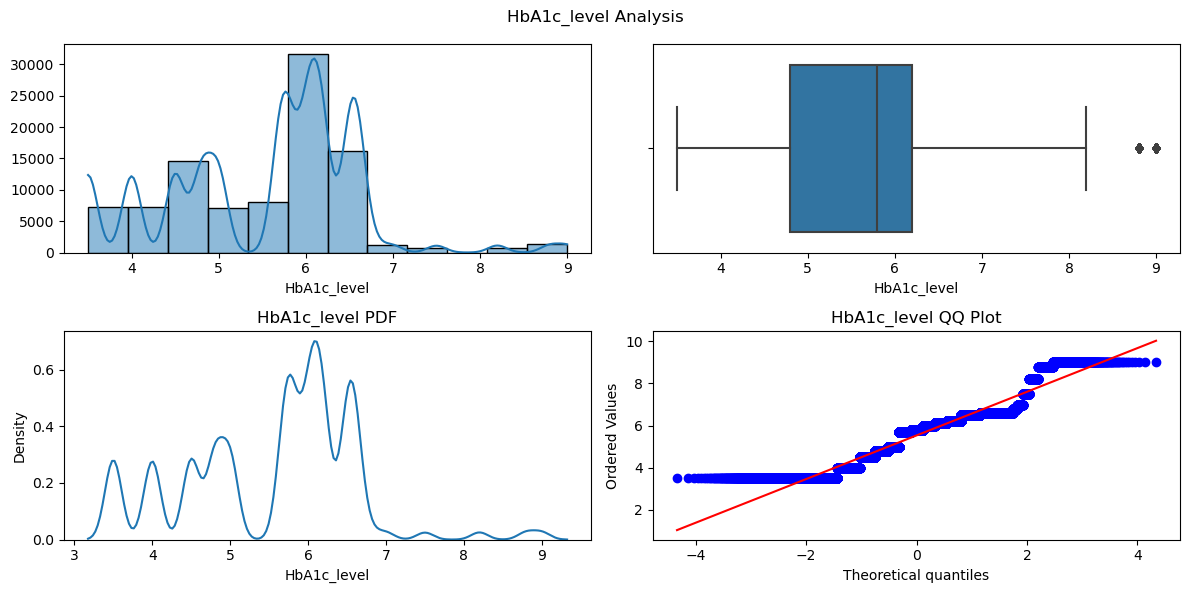

In [27]:
# HbA1c_level distribution
print(uv_analysis('HbA1c_level'))

**BV/MV Analysis**

In [28]:
df.sample(2)

gender   age  hypertension  heart_disease smoking_history    bmi  \
48101   Male  20.0             0              0           never  22.36   
95151   Male  14.0             0              0     not current  25.49   

       HbA1c_level  blood_glucose_level  diabetes age_stage  
48101          4.0                  200         0     Youth  
95151          4.8                  158         0  Teenager

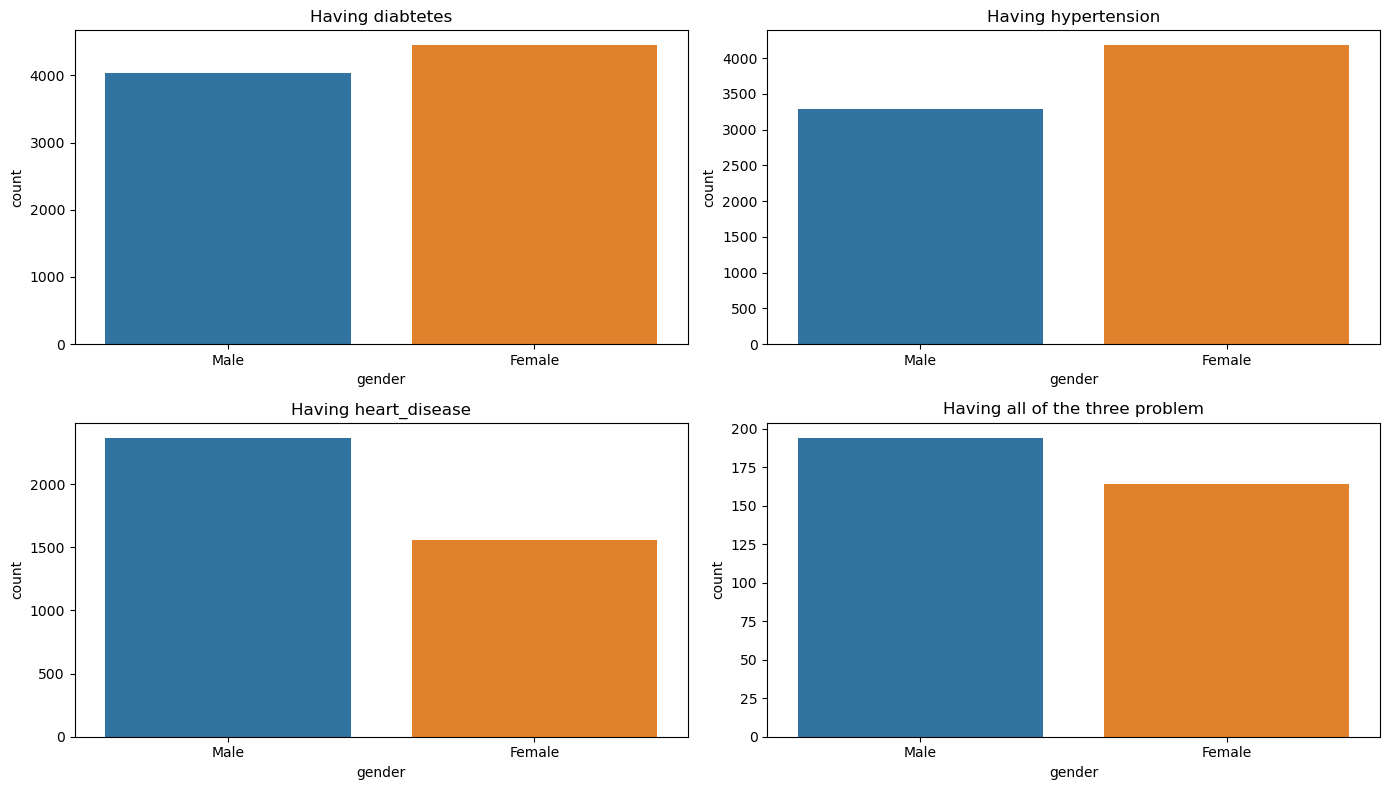

In [29]:
# BV countplot
plt.figure(figsize=(14,8))

plt.subplot(2,2,1)
sns.countplot(df[df.diabetes==1],x='gender',order=['Male','Female'])
plt.title('Having diabtetes')

plt.subplot(2,2,2)
sns.countplot(df[df.hypertension==1],x='gender',order=['Male','Female'])
plt.title('Having hypertension')

plt.subplot(2,2,3)
sns.countplot(df[df.heart_disease==1],x='gender',order=['Male','Female'])
plt.title('Having heart_disease')

plt.subplot(2,2,4)
sns.countplot(df[(df.diabetes==1) & (df.hypertension==1) & (df.heart_disease==1)],
              x='gender',order=['Male','Female'])
plt.title('Having all of the three problem')
plt.tight_layout()

In [30]:
# smoking x gender x age_stage pivot_table
smoking_record = pd.pivot_table(data=df,columns=['gender','age_stage'],index='smoking_history',
                    values='hypertension',aggfunc='sum',fill_value=0)
smoking_record

gender          Female                                     Male               \
age_stage        Adult Child Infant Senior Teenager Youth Adult Child Infant   
smoking_history                                                                
No Info            306     1      0    338        1     2   286     1      0   
current            288     0      0    110        0     3   324     1      0   
ever               117     0      0     75        0     0   128     0      0   
former             250     0      0    353        0     0   341     0      0   
never             1041     1      0    984        2     6   735     0      0   
not current        143     0      0    155        0     3   109     0      0   

gender                                 
age_stage       Senior Teenager Youth  
smoking_history                        
No Info            251        2     3  
current            104        0     2  
ever                99        0     0  
former             392        0     1  
never              415        1     9  
not current         78        0     0

<Axes: xlabel='gender-age_stage', ylabel='smoking_history'>

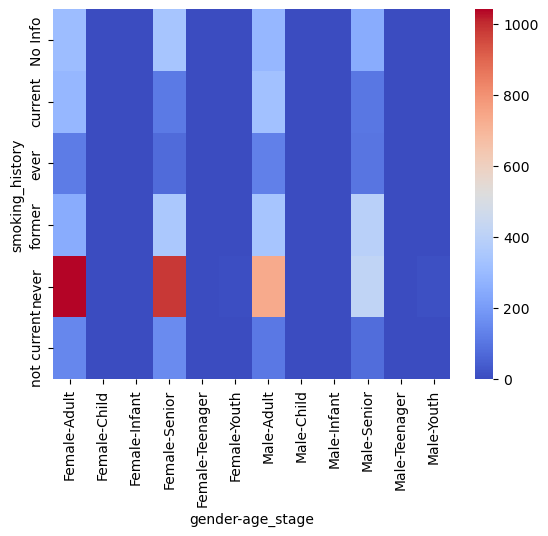

In [31]:
sns.heatmap(smoking_record,cmap='coolwarm')

<Axes: xlabel='age_stage', ylabel='bmi'>

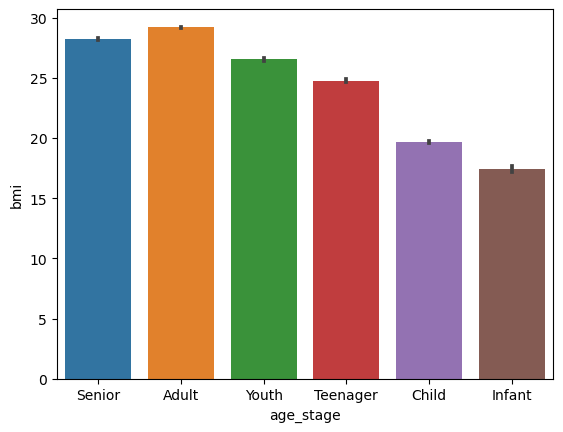

In [32]:
sns.barplot(data=df,x='age_stage',y='bmi',estimator='mean')

In [33]:
def pdf_plot(col):
    plt.figure(figsize=(14,4))

    plt.subplot(1,3,1)
    sns.distplot(df[df.diabetes==1][col],hist=False,color='red',label='1')
    sns.distplot(df[df.diabetes==0][col],hist=False,color='green',label='0')
    plt.title(col+' x diabetes PDF')
    plt.legend()

    plt.subplot(1,3,2)
    sns.distplot(df[df.hypertension==1][col],hist=False,color='red')
    sns.distplot(df[df.hypertension==0][col],hist=False,color='green')
    plt.title(col+' x hypertension PDF')

    plt.subplot(1,3,3)
    sns.distplot(df[df.heart_disease==1][col],hist=False,color='red')
    sns.distplot(df[df.heart_disease==0][col],hist=False,color='green')
    plt.title(col+' x heart_disease PDF')
    plt.tight_layout()

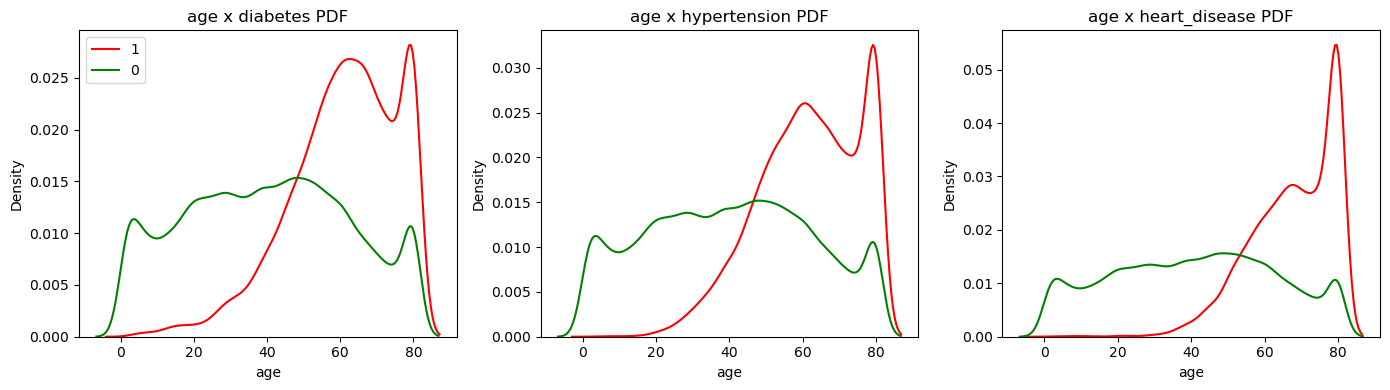

In [34]:
pdf_plot('age')

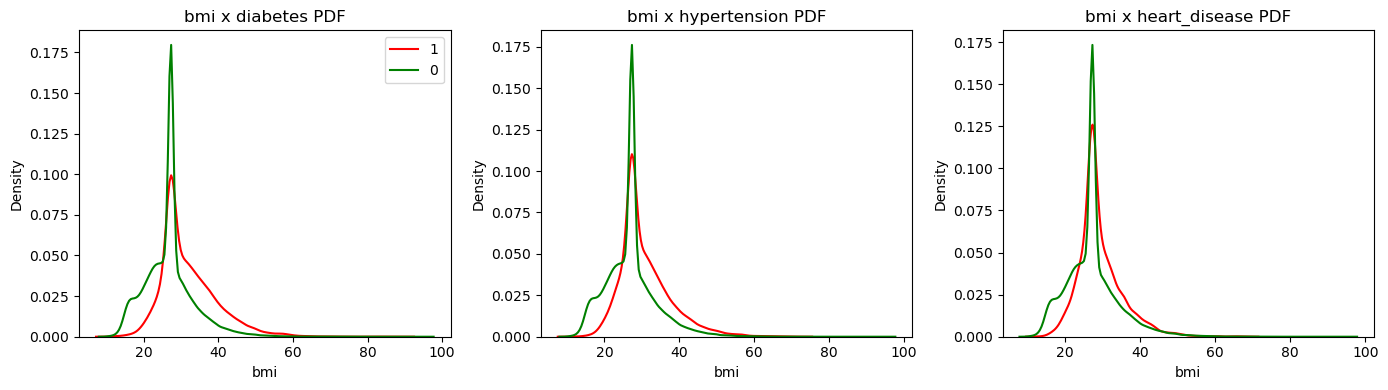

In [35]:
pdf_plot('bmi')

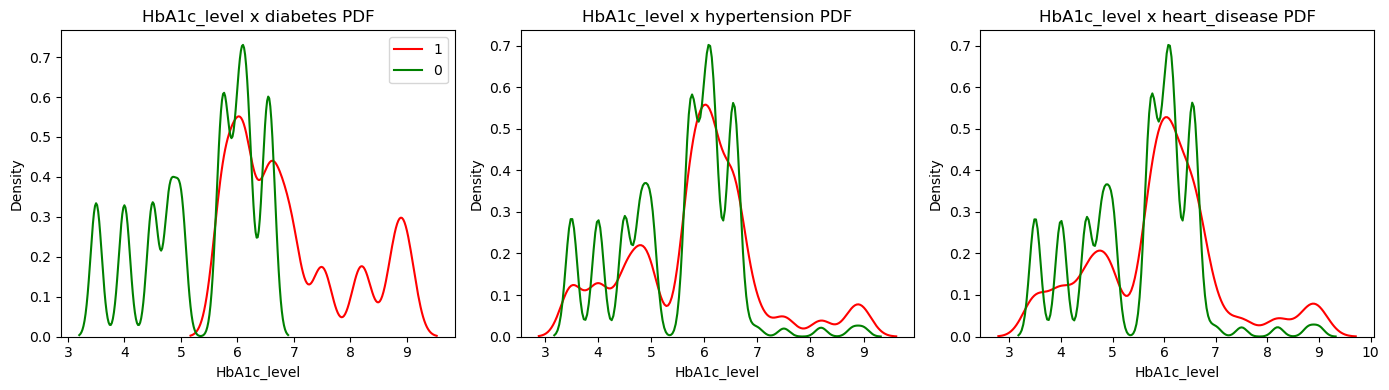

In [36]:
pdf_plot('HbA1c_level')

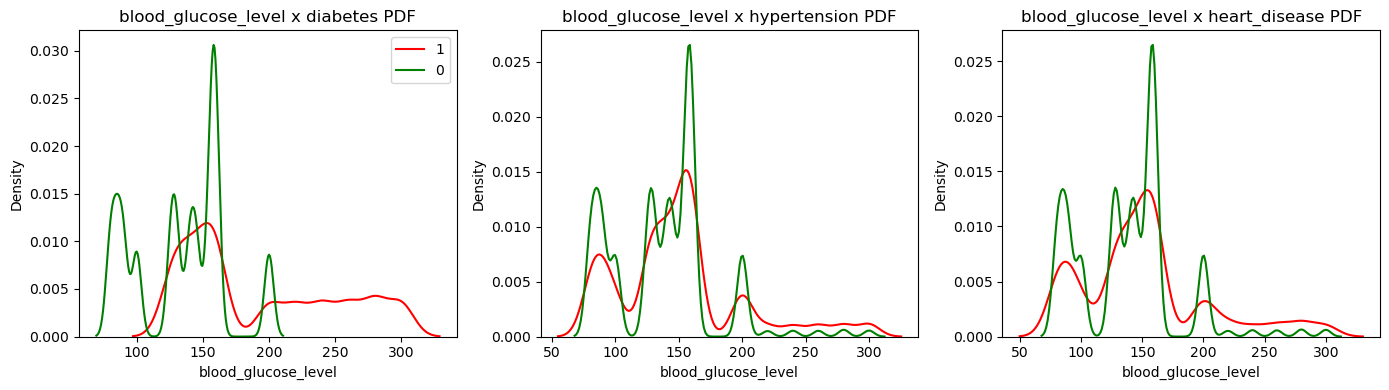

In [37]:
pdf_plot('blood_glucose_level')

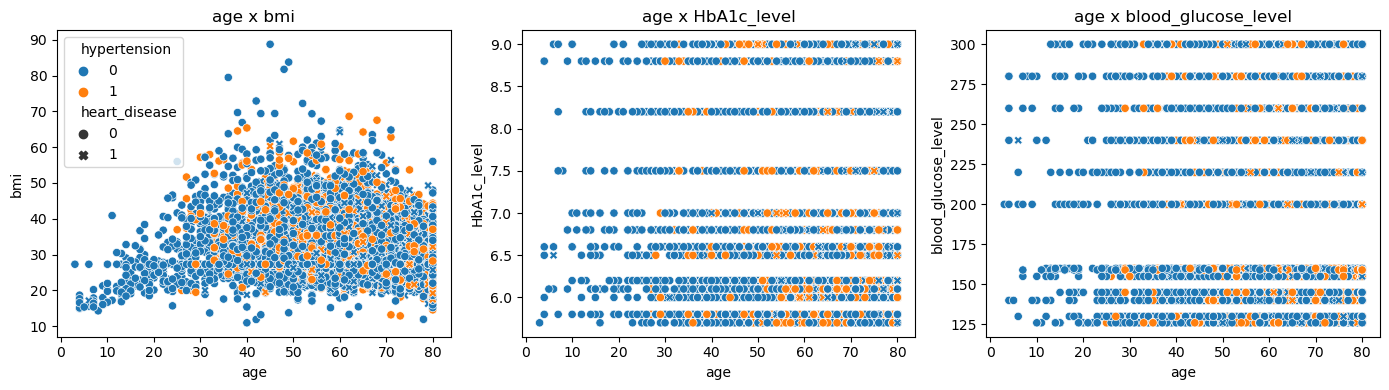

In [38]:
df_diabetes = df[df.diabetes==1]

plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
sns.scatterplot(data=df_diabetes,x='age',y='bmi',hue='hypertension',style='heart_disease')
plt.title('age x bmi')

plt.subplot(1,3,2)
sns.scatterplot(data=df_diabetes,x='age',y='HbA1c_level',hue='hypertension',style='heart_disease',legend='')
plt.title('age x HbA1c_level')

plt.subplot(1,3,3)
sns.scatterplot(data=df_diabetes,x='age',y='blood_glucose_level',hue='hypertension',style='heart_disease',legend='')
plt.title('age x blood_glucose_level')
plt.tight_layout()

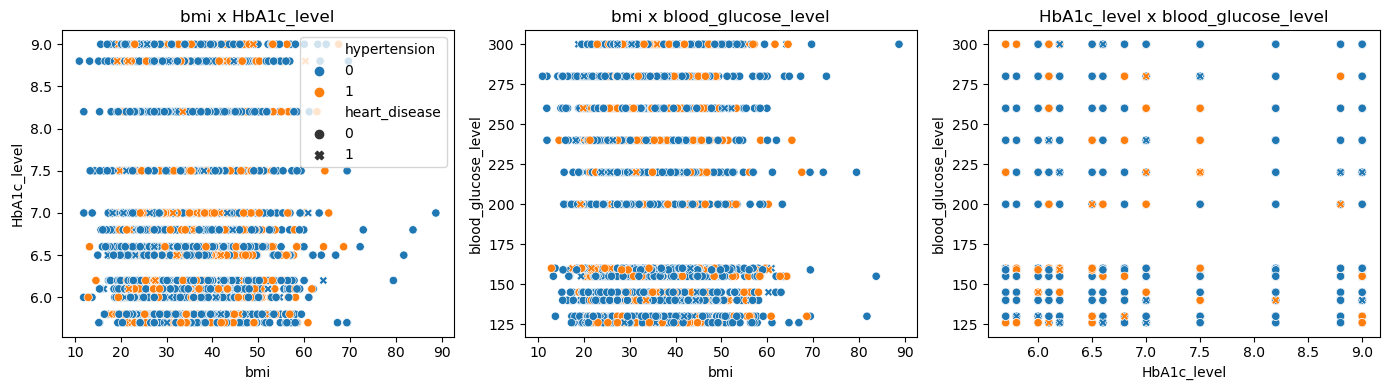

In [39]:
plt.figure(figsize=(14,4))

plt.subplot(131)
sns.scatterplot(data=df_diabetes,x='bmi',y='HbA1c_level',hue='hypertension',style='heart_disease')
plt.title('bmi x HbA1c_level')
plt.legend()

plt.subplot(132)
sns.scatterplot(data=df_diabetes,x='bmi',y='blood_glucose_level',hue='hypertension',
                style='heart_disease',legend='')
plt.title('bmi x blood_glucose_level')

plt.subplot(133)
sns.scatterplot(data=df_diabetes,x='HbA1c_level',y='blood_glucose_level',hue='hypertension',
                style='heart_disease',legend='')
plt.title('HbA1c_level x blood_glucose_level')
plt.tight_layout()

# 5. Outliers Handling

<Axes: >

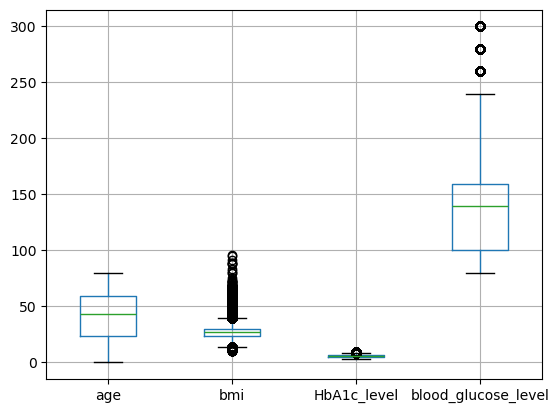

In [40]:
df[['age','bmi','HbA1c_level','blood_glucose_level']].boxplot()

In [41]:
def outlier_detection(Column):
    Q3 = df[Column].quantile(0.75)
    Q1 = df[Column].quantile(0.25)
    IQR = Q3-Q1
    Up_Lim = Q3+1.5*IQR
    Low_Lim = Q1-1.5*IQR
    num = len(df[(df[Column]>Up_Lim)|(df[Column]<Low_Lim)])
    print('Number of Outliers:',num)
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    sns.boxplot(df[Column])
    plt.subplot(122)
    sns.boxplot(x=df.diabetes,y=df[Column])
    plt.tight_layout()
    
def outlier_capping(column):
    x = df[column]
    q3 = df[column].quantile(0.75)
    q1 = df[column].quantile(0.25)
    iqr = q3-q1
    upper_limit = q3+1.5*iqr
    lower_limit = q1-1.5*iqr
    df[column] = np.where(df[column]>upper_limit,upper_limit,
                          np.where(df[column]<lower_limit,lower_limit,df[column]))
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    sns.boxplot(df[column])
    plt.subplot(122)
    sns.distplot(x,hist=False,color='r')
    sns.distplot(df[column],hist=False,color='g')
    plt.tight_layout()

Number of Outliers: 5354


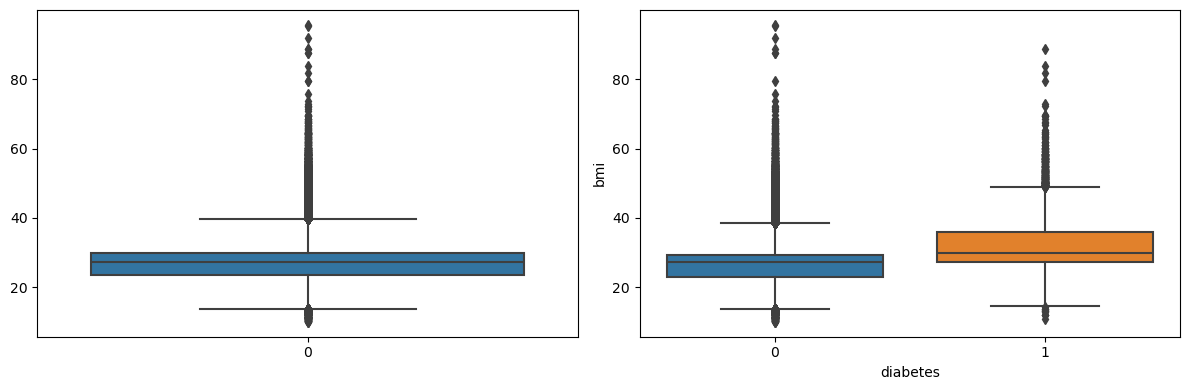

In [42]:
outlier_detection('bmi')

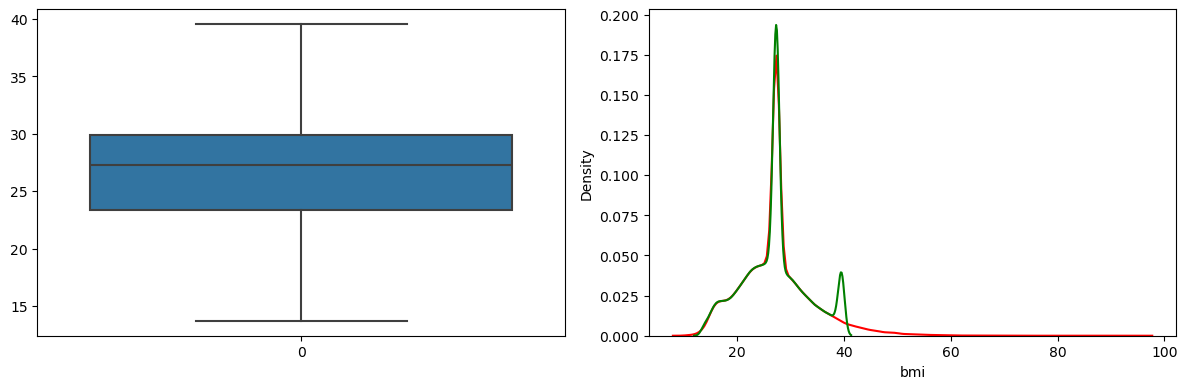

In [43]:
outlier_capping('bmi')

Number of Outliers: 1312


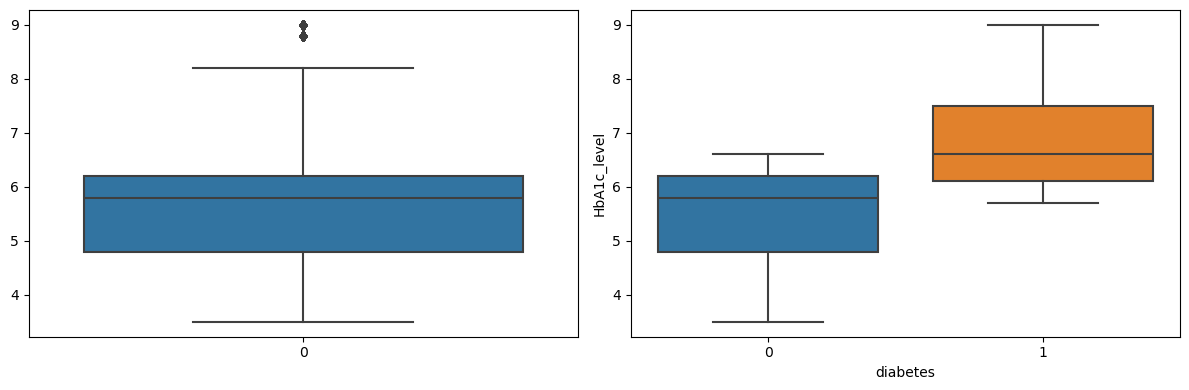

In [44]:
outlier_detection('HbA1c_level')

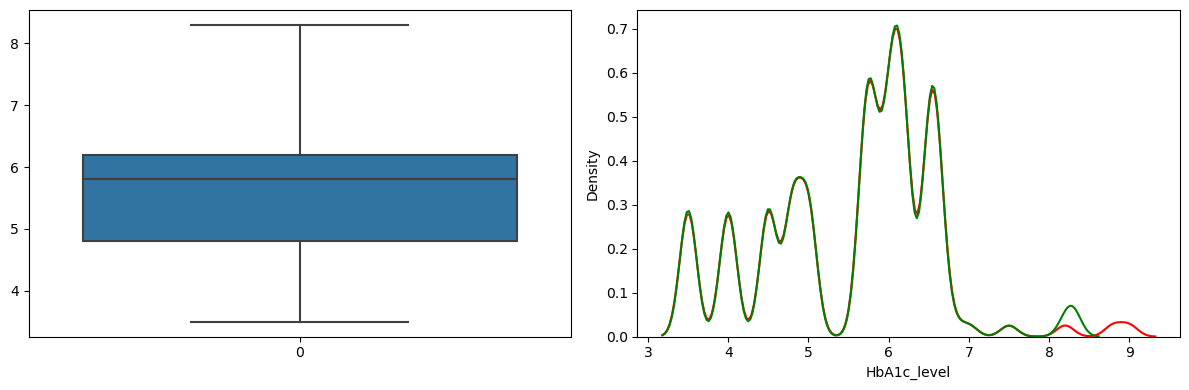

In [45]:
outlier_capping('HbA1c_level')

Number of Outliers: 2031


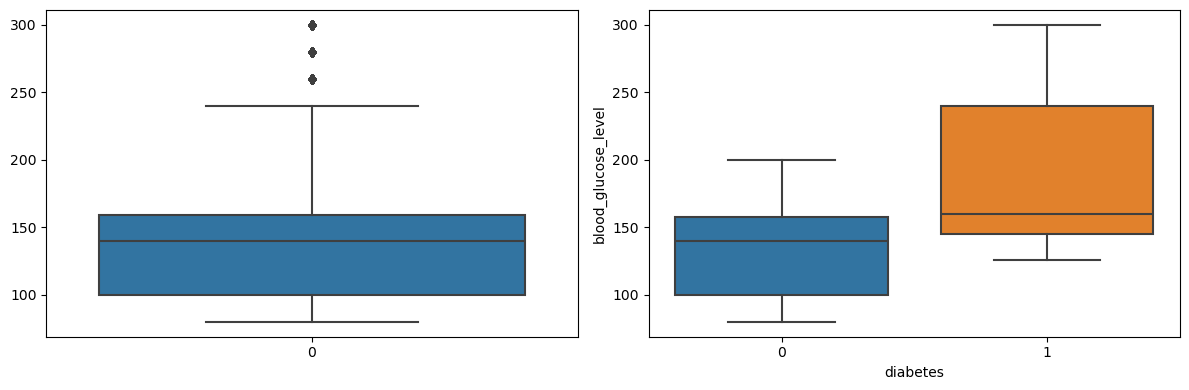

In [46]:
outlier_detection('blood_glucose_level')

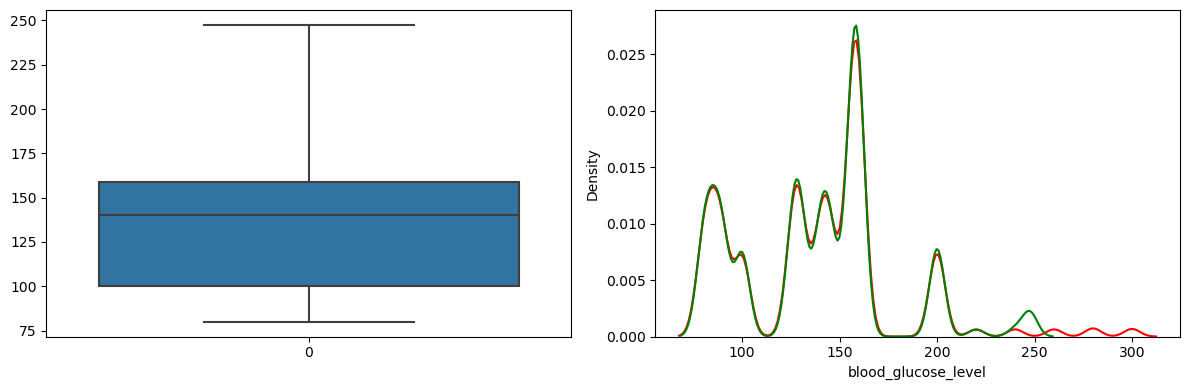

In [47]:
outlier_capping('blood_glucose_level')

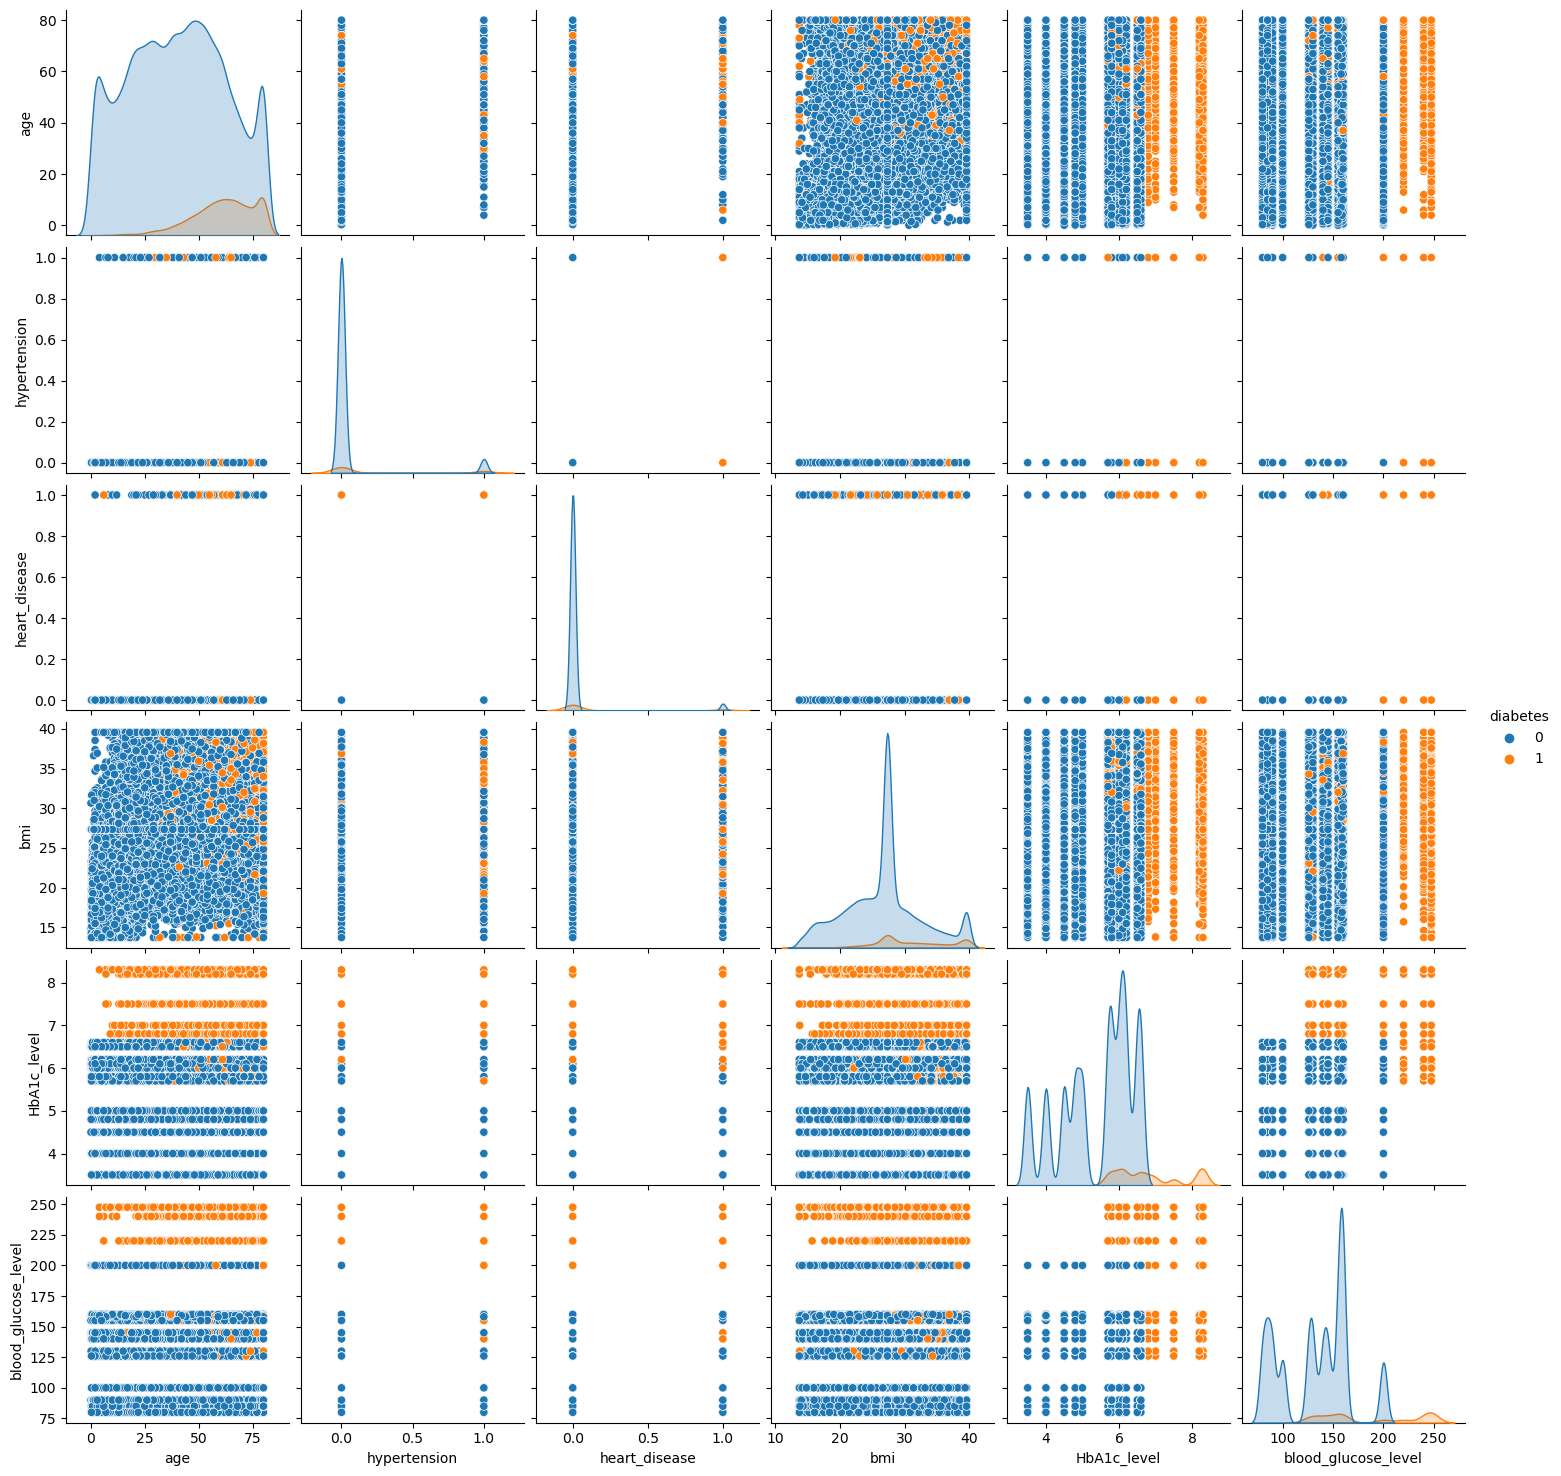

In [48]:
sns.pairplot(df,diag_kind='kde',hue='diabetes')

# 6. Data Preprocessing

In [49]:
# necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
# Display Pipeline
from sklearn import set_config
set_config(display='diagram')

In [50]:
X = df.drop('diabetes',axis=1)     # features
y = df['diabetes']                 # target variable

# transformer 1
trf1 = ColumnTransformer(transformers=[
    ('ohe',OneHotEncoder(sparse=False),[0,4,8])
],remainder='passthrough')

# transformer 2
trf2 = ColumnTransformer(transformers=[
    ('scaling',StandardScaler(),slice(0,21))
],remainder='passthrough')

# building pipeline
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2)])

# split up X,y
Xtrain, Xtest, ytrain, ytest = train_test_split(X , y , random_state=65, stratify=df.diabetes)

# transform data
Xtrain_fit = pipe.fit_transform(Xtrain)
Xtest_fit =  pipe.transform(Xtest)

# pipeline workflow
pipe

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(sparse=False),
                                                  [0, 4, 8])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaling', StandardScaler(),
                                                  slice(0, 21, None))]))])

# 7. Model Construction

**KNeighborsClassifier**

n_nb: 4 max score: 0.9582223701731025


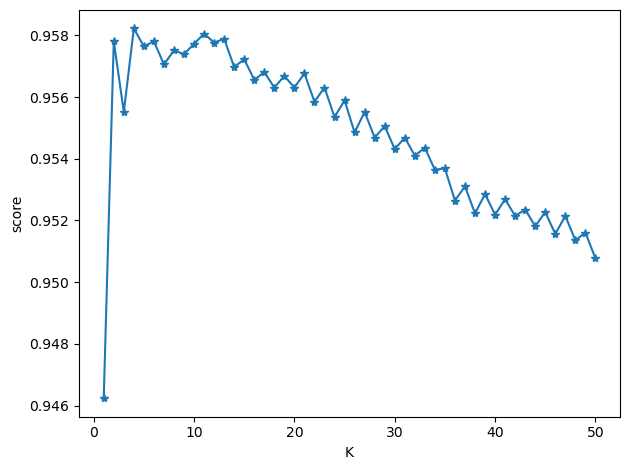

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
score = []
n_nb = []
for k in range(1,51):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(Xtrain_fit,ytrain)
    y_pred = knn.predict(Xtest_fit)
    score.append(accuracy_score(ytest,y_pred))
    n_nb.append(k)
print( 'n_nb:',n_nb[score.index(max(score))],'max score:',max(score))
plt.plot(n_nb,score,'*-')
plt.xlabel('K')
plt.ylabel("score")
plt.tight_layout()

In [53]:
# building a model with K=4
Knn = KNeighborsClassifier(n_neighbors=4)
Knn.fit(Xtrain_fit,ytrain)
y_pred = Knn.predict(Xtest_fit)
accuracy_score(ytest,y_pred)

0.9582223701731025

In [54]:
# cross validate the model
from sklearn.model_selection import cross_val_score
cross_val_score(Knn,Xtrain_fit,ytrain,cv=5,scoring='accuracy').mean()

0.9575565911790568

In [63]:
from sklearn import metrics
conf_matrix = metrics.confusion_matrix(ytest,y_pred)
confusion_matrix = pd.DataFrame(conf_matrix, index=['True 0', 'True 1'], columns=['Predicted 0', 'Predicted 1'])
confusion_matrix

Predicted 0  Predicted 1
True 0        21814           98
True 1          906         1214

In [61]:
 pd.DataFrame(conf_matrix, index=['True 0', 'True 1'], columns=['Predicted 0', 'Predicted 1'])

Predicted 0  Predicted 1
True 0        21814           98
True 1          906         1214